# GK9102 Data Science "Probabilistische Modellierung" (POSA)

Andreas Sünder - 21.12.2023

## The Bayesian Way

### Grundlagen

Bayesian Inference
* Definition: updating one's beliefs about a hypothesis as new information becomes available.
* is statistically correct even with little data

Darstellen von Wahrscheinlichkeiten in Python:

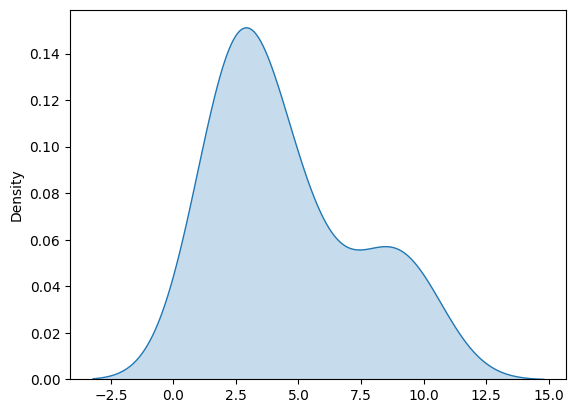

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste der Ziehungen
draws = [4.8965301775481835, 2.7773683448746667, 10.09075099583615, 2.248355277758697, 4.97445385956666, 2.8525720557785617, 1.9606485835258463, 9.094001197650389, 2.899645995467589, 8.161014208247678, 1.503981043342368, 6.309643538930294, 8.819082426904082, 1.472813045574119, 3.3109342512394484, 4.160426132108971, 2.6415037488618496, 3.1823911047498967]

# Darstellen als Plot
sns.kdeplot(draws, fill=True)
plt.show()

Binomialverteilung:
* diskrete Verteilung, die nur zwei Werte annehmen kann (z.B. 0 oder 1)

In Python:

In [6]:
import numpy as np

# Ziehungen simulieren
np.random.binomial(
  100,  # Anzahl der Versuche
  0.5   # Wahrscheinlichkeit für Erfolg  
)

54

Auch kann mit dieser Funktion die Draws direkt erhalten:

In [7]:
np.random.binomial(
  1,      # Anzahl der Versuche auf 1 setzen
  0.5,
  size=5  # Anzahl der Versuche hier angeben
)

array([0, 0, 1, 1, 1])

## Bayesian estimation

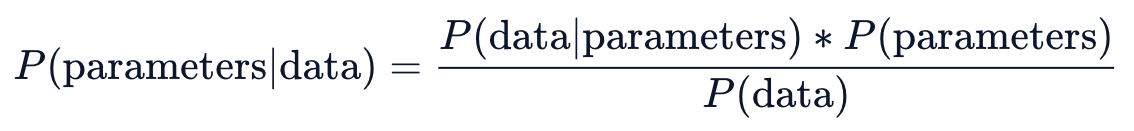

### Beispiel

Beispiel:

*You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug. An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.*

In [2]:
import numpy as np
import pandas as pd

# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0, 11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0.0, 1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


*According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.*

/var/folders/mx/px22c6tj3rz__gl1g635_wsm0000gn/T/ipykernel_48165/755895169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


<Axes: xlabel='efficacy_rate', ylabel='posterior_prob'>

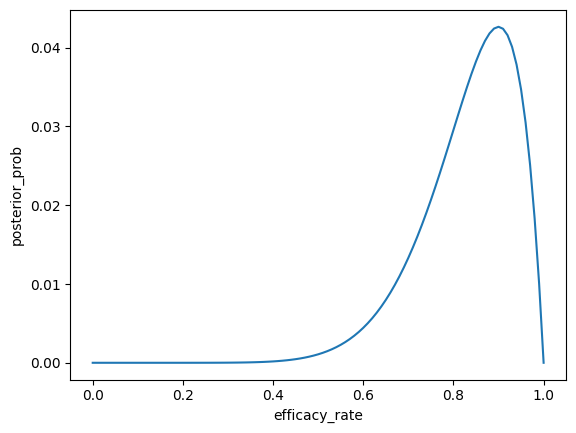

In [11]:
from scipy.stats import binom, uniform
import seaborn as sns

# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

# Plot the drug's posterior efficacy rate
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], y=df_9_of_10_cured["posterior_prob"])

*Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data! This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!*

/var/folders/mx/px22c6tj3rz__gl1g635_wsm0000gn/T/ipykernel_48165/3498830042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


<Axes: xlabel='efficacy_rate', ylabel='new_posterior_prob'>

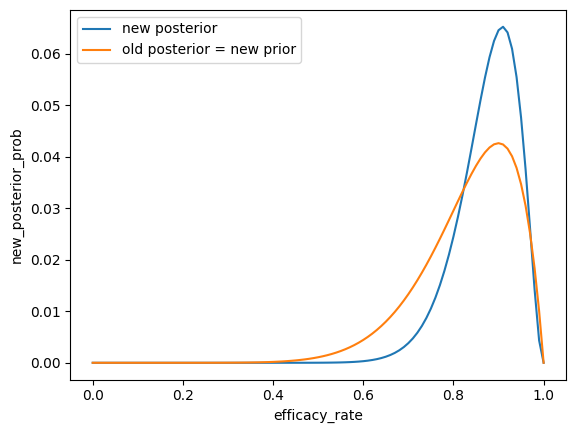

In [16]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

# Plot the new drug's posterior efficacy rate upon the old one
sns.lineplot(x=df_10_of_12_cured["efficacy_rate"], 
             y=df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], 
             y=df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")

### Prior distributions

In der Praxis können die berechneten Posterior-Distributionen als Prior-Distributionen für weitere Berechnungen verwendet werden. Des Weiteren hat sich gezeigt, dass gewisse Prior-Distributions eine sogenannte "Conjugate Prior" sind. Dies bedeutet, dass die Posterior-Distribution die gleiche Form hat wie die Prior-Distribution. Im Beispiel von vorhin kann die Beta-Verteilung als Prior-Distribution verwendet werden. Die Beta-Verteilung ist eine Conjugate Prior für die Binomial-Verteilung, womit sich die Posterior-Distribution "simulieren" lässt:

<Axes: ylabel='Density'>

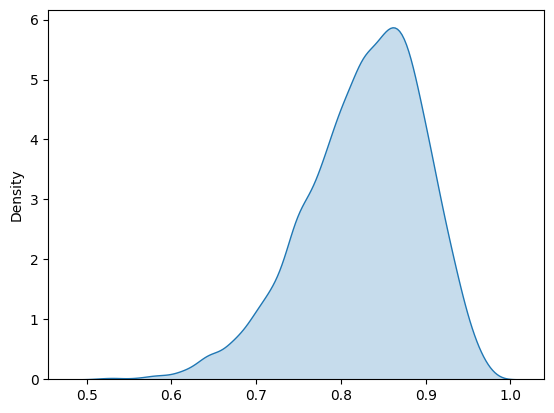

In [19]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, fill=True)

### Point estimates

Machen wir weiter:

In [24]:
drug_efficacy_posterior_draws = posterior_draws

# Calculate the expected number of people cured
cured_expected = np.mean(drug_efficacy_posterior_draws) * 100_000

# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.percentile(drug_efficacy_posterior_draws, 50) * 100_000

# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100_000

# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 82691 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 83483, and with 90% probability 
it will not be less than 73343.


In [25]:
# Import arviz as az
import arviz as az

# Calculate HPD credible interval of 90%
ci_90 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.9)

# Calculate HPD credible interval of 95%
ci_95 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.72 and 0.94, 
and with a 95% probability it is between 0.69 and 0.95.


## Bayesian inference

### A/B testing 

Beispiel:

*After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience. You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that* $Beta(10, 10)$ *would be a good prior for the click-through rate.*

<Axes: ylabel='Density'>

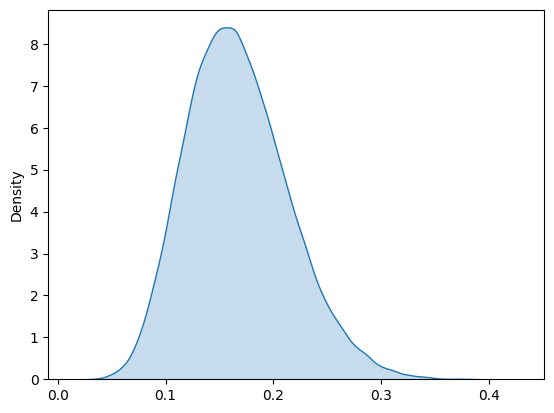

In [1]:
import numpy as np
import seaborn as sns

# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, fill=True, label="prior")

In [2]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
  num_successes = np.sum(trials)
  posterior_draws = np.random.beta(
    num_successes + beta_prior_a,
    len(trials) - num_successes + beta_prior_b,
    10000
  )
  return posterior_draws

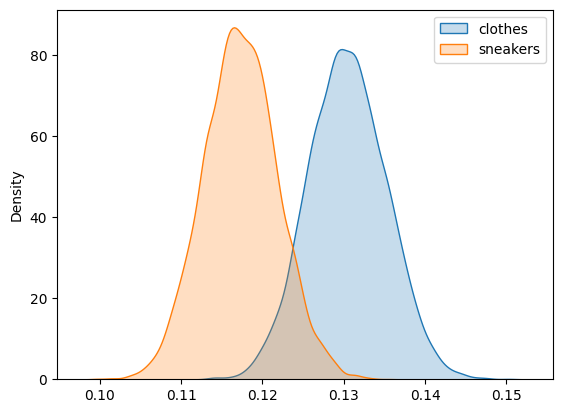

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the banner_clicked column for each product
ads = pd.read_csv("ads.csv")
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

sns.kdeplot(clothes_posterior, fill=True, label="clothes")
sns.kdeplot(sneakers_posterior, fill=True, label="sneakers")
plt.legend()

*You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!*

[0.00205322 0.02370731]
0.9775


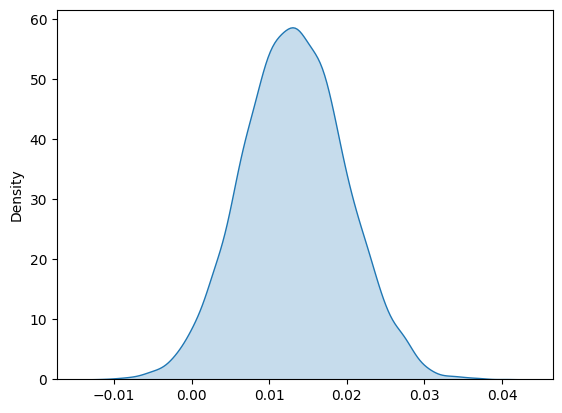

In [4]:
import arviz as az

# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, fill=True, label="diff")

# Calculate and print 90% credible interval of posterior difference
interval = az.hdi(diff, hdi_prob=0.9)
print(interval)

# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

*You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign? The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.*

In [5]:
# Slice diff to take only cases where it is negative
loss = diff[diff < 0]

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

-0.002374495825529671


### Decision analysis

Decision analysis:
- translating parameters to relevant metrics to inform decision-making

Weiter geht es: *Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as `clothes_posterior` and `sneakers_posteriors`, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges `$2.5` per click on a mobile device and `$2` on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.*

array([<Axes: title={'center': '99.0% HDI'}>], dtype=object)

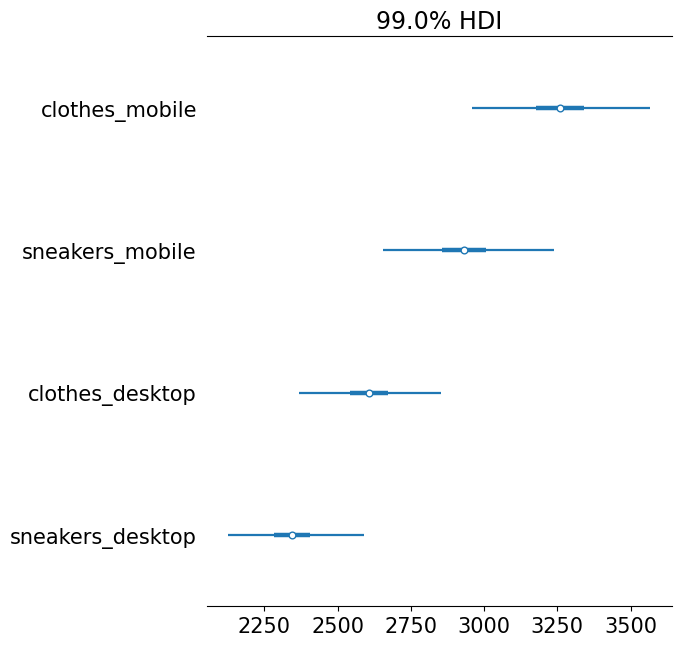

In [7]:
import arviz as az

# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10_000
sneakers_num_clicks = sneakers_posterior * 10_000

# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

# Draw a forest plot of ads_costs
az.plot_forest(ads_costs, hdi_prob=0.99, textsize=15)

*Good job translating the posterior click rates into cost distributions! In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is $3.4, and the one from a desktop ad is $3? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.*

array([<Axes: title={'center': '99.0% HDI'}>], dtype=object)

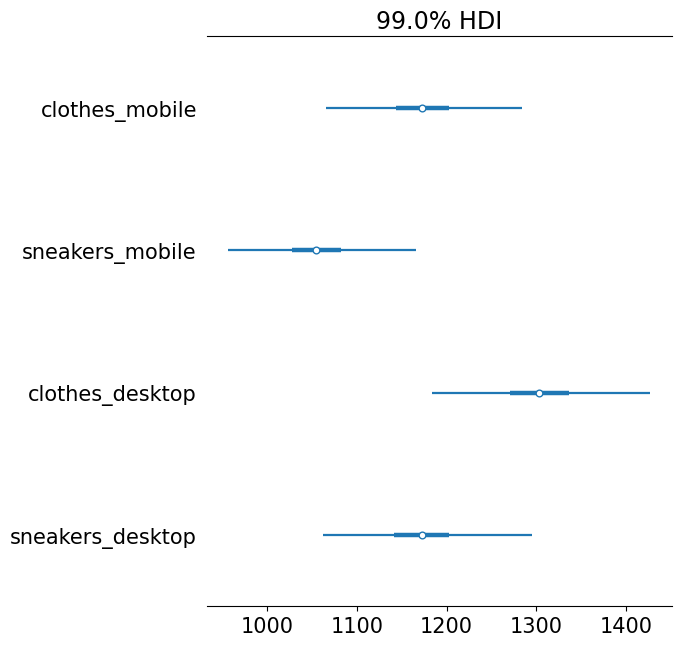

In [9]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 3.4 - ads_costs["clothes_mobile"],
    "sneakers_mobile": sneakers_num_clicks * 3.4 - ads_costs["sneakers_mobile"],
    "clothes_desktop": clothes_num_clicks * 3 - ads_costs["clothes_desktop"],
    "sneakers_desktop": sneakers_num_clicks * 3 - ads_costs["sneakers_desktop"],
}

# Draw a forest plot of ads_profit
az.plot_forest(ads_profit, hdi_prob=0.99, textsize=15)

### Regression and forecasting

*Your linear regression model has four parameters: the intercept, the impact of clothes ads, the impact of sneakers ads, and the variance. The draws from their respective posterior distributions have been sampled for you and are available as intercept_draws, clothes_draws, sneakers_draws, and sd_draws, respectively.*

```python
# Collect parameter draws in a DataFrame (data not available)
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})

# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)

# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob=0.99)
```

```
       intercept_draws  clothes_draws  sneakers_draws  sd_draws
count         2000.000       2000.000        2000.000  2000.000
mean             1.280          0.105           0.104     2.652
std              0.904          0.030           0.032     0.159
min             -2.088         -0.007           0.001     2.212
25%              0.712          0.085           0.082     2.543
50%              1.288          0.105           0.104     2.639
75%              1.849          0.124           0.125     2.755
max              4.344          0.230           0.212     3.278
```

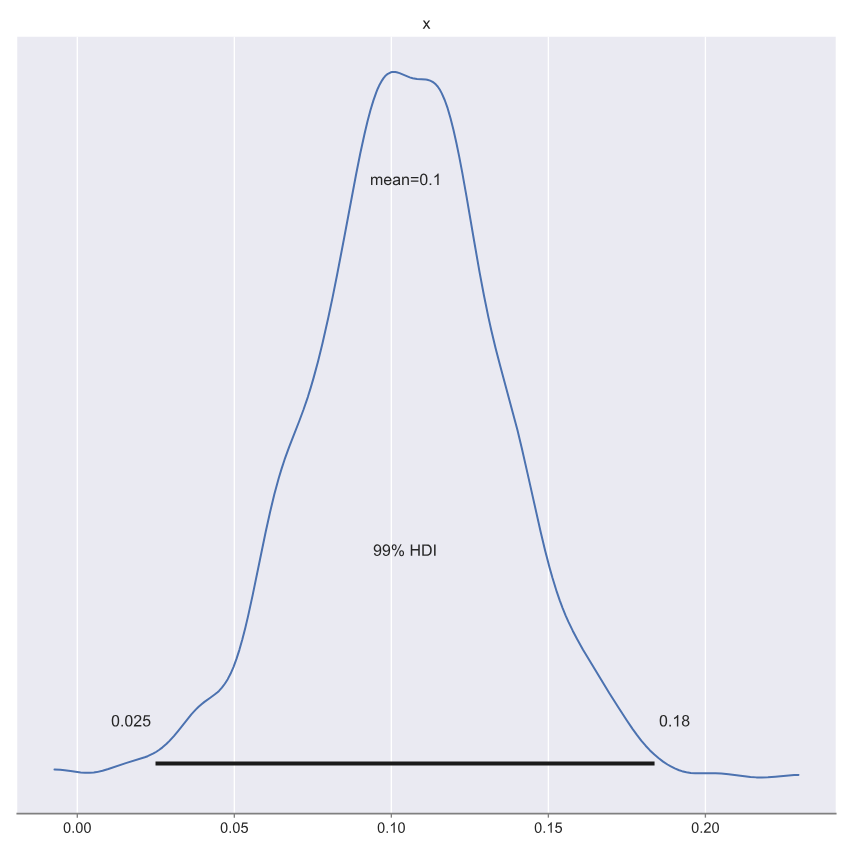

*Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.*

```python
# Aggregate posteriors of the parameters to point estimates (data not available)
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef * 10 + clothes_coef * 10

# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
```

## Bayesian linear regression with pyMC3

### Monte Carlo Markov Chain (MCMC)

Monte Carlo Markov Chain (MCMC):
* Approximieren der Posterior-Verteilung mit einer Markov Chain
* es werden zufällige Werte (bzw. Punkte) gezogen, wobei jeder Wert (in jeder Iteration) entweder akzeptiert oder verworfen wird
* die gezogenen Werte werden verwendet, um die Posterior-Verteilung zu approximieren

Mit `PyMC` können lineare Modelle auf Basis von MCMC erstellt werden. Oft ist es sinnvoll, mehrere Modelle zu erstellen und diese zu vergleichen. Ein einziges Modell lässt sich mit Traceplots und Forestplot visualieren.

![Element 1.png](<attachment:Element 1.png>)
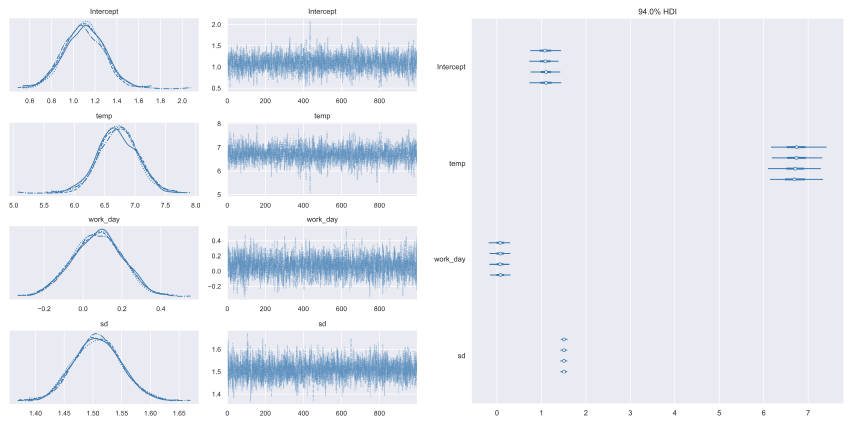

Mehrere Modelle lassen sich mit `compareplot` vergleichen:

```python
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {
    "trace_1": trace_1,
    "trace_2": trace_2
}

# Gather trace_1 and trace_2 into a dictionary
traces_dict = {"trace_1": trace_1, "trace_2": trace_2}

# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic="waic")

pm.compareplot(trace_1, trace_2)
```

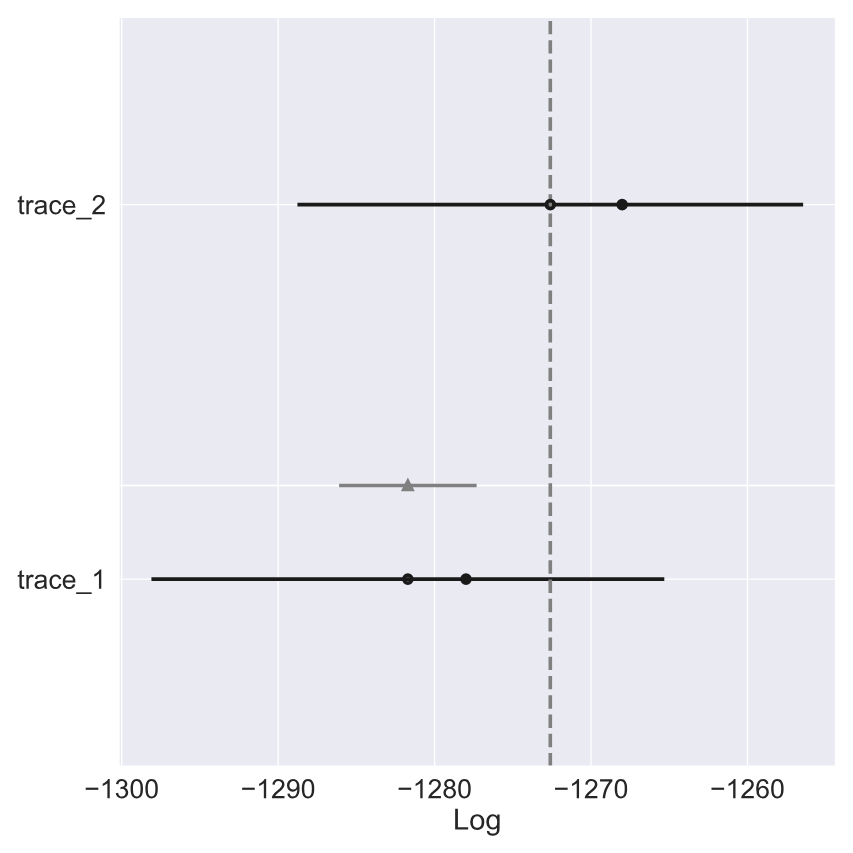

### Making predictions

Sobald Testdaten vorhanden sind, ist es sinnvoll, ein Modell damit zu evaluieren. Dies erreicht man etwa durch Berechnen des absoluten Fehlers zwischen dem linearen Modell und den echten Werten, wobei das Ergebnis wieder mittels `plot_posterior` visualisiert werden kann:

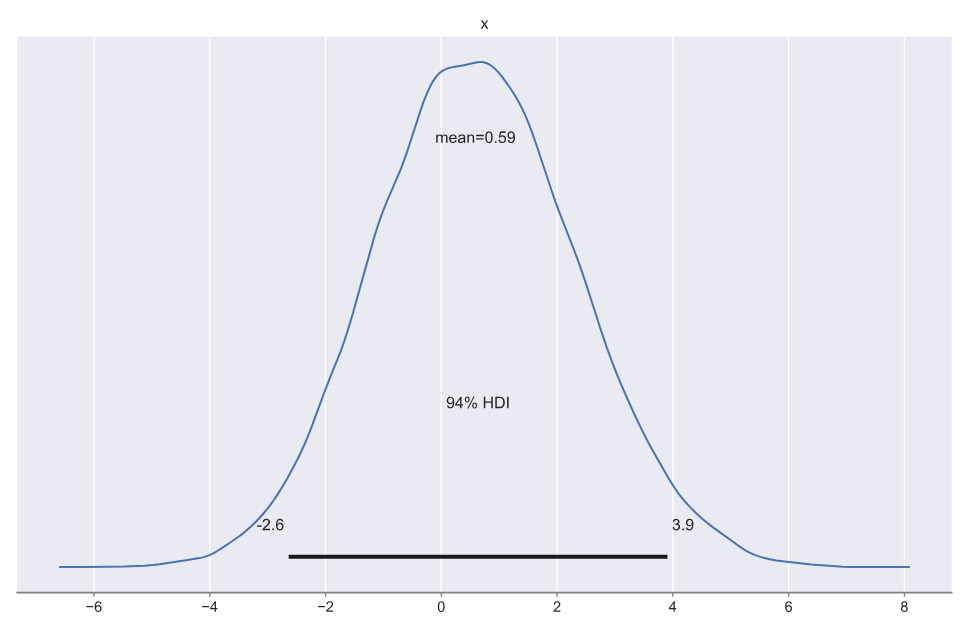